## Importing Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

### 1. Load the movies dataset into pandas from <a href="https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv">this link</a>

In [2]:
data_url = 'https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv'

In [3]:
df = pd.read_csv(data_url)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [5]:
df.head(5)

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


In [6]:
df.shape

(77, 8)

### 2. List all dataset columns and examine their types. Explore the various fields’ statistics. Describe what data we have.

In [7]:
columns = list(df)
# df.columns.values.tolist()

In [8]:
#Printing the name of columns in the dataframe
print(columns)

['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability', 'Rotten Tomatoes %', 'Worldwide Gross', 'Year']


In [9]:
data_type = []
for i in df.columns:
    data_type.append(df[i].dtype)
pd.DataFrame(list(zip(df.columns, data_type)), columns=['Variables','Data types'])

,Variables,Data types
0,Film,object
1,Genre,object
2,Lead Studio,object
3,Audience score %,int64
4,Profitability,float64
5,Rotten Tomatoes %,int64
6,Worldwide Gross,object
7,Year,int64


In [10]:
round(df.describe(), 2)

,Audience score %,Profitability,Rotten Tomatoes %,Year
count,77.00,77.00,77.0,77.00
mean,63.73,4.60,46.7,2009.08
std,13.66,8.03,26.1,1.35
min,35.00,0.00,3.0,2007.00
25%,52.00,1.75,26.0,2008.00
50%,64.00,2.64,45.0,2009.00
75%,76.00,5.10,64.0,2010.00
max,89.00,66.93,96.0,2011.00


### 3. How many movies are there in the dataset in total?

In [11]:
df = df.drop_duplicates('Film')
print("Number of movies in the dataset in total:", df['Film'].count())

Number of movies in the dataset in total: 75


### 4. How many movies are there in the dataset for each year?

In [12]:
pd.DataFrame(df.groupby(['Year']).count()["Film"])

,Film
Year,
2007,11
2008,19
2009,12
2010,20
2011,13


### 5. Show the details of the least and most profitable movies in the dataset.

In [13]:
df_sorted_by_profit = df.sort_values(by='Profitability').reset_index(drop=True)
print("Least profitable movie: {} with {} profit.".format(df_sorted_by_profit['Film'].iloc[0], df_sorted_by_profit['Profitability'].iloc[0]))
print("Most profitable movie: {} with {} profit.".format(df_sorted_by_profit['Film'].iloc[-1], df_sorted_by_profit['Profitability'].iloc[-1]))

Least profitable movie: When in Rome with 0.0 profit.
Most profitable movie: Fireproof with 66.934 profit.


### 6. The ‘Genre’ value seems to be inconsistent at times; try to find these inconsistenciesand fix them.

In [14]:
df["Genre"].isnull().value_counts()

False    75
Name: Genre, dtype: int64

In [15]:
df['Genre'].value_counts()

Comedy       40
Drama        13
Romance      13
Animation     3
Romence       1
Action        1
Comdy         1
Fantasy       1
comedy        1
romance       1
Name: Genre, dtype: int64

In [16]:
typo_dict = {
    "Romence": "Romance",
    "Comdy": "Comedy"
}

In [17]:
df.Genre.replace(typo_dict, inplace=True)

In [18]:
df[df['Genre'] == ''].index

Int64Index([], dtype='int64')

<img src="./assets/images/genre.png"> <br>
Here, in some rows, the genres of the movies are lower cased

In [19]:
df['Genre'] = df['Genre'].str.capitalize()

In [20]:
df['Genre'].value_counts()

Comedy       42
Romance      15
Drama        13
Animation     3
Fantasy       1
Action        1
Name: Genre, dtype: int64

### 7. Save (to a new CSV file) the top 10 comedies by audience score; show only moviename, year, and lead studio.

In [21]:
top_10 = df.sort_values(by='Audience score %', ascending=False)

In [22]:
top_10

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
6,WALL-E,Animation,Disney,89,2.896019,96,$521.28,2008
22,Tangled,Animation,Disney,88,1.365692,89,$355.01,2010
39,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,$8.26,2011
72,Across the Universe,Romance,Independent,84,0.652603,54,$29.37,2007
...,...,...,...,...,...,...,...,...
55,Killers,Action,Lionsgate,45,1.245333,11,$93.40,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
18,The Heartbreak Kid,Comedy,Paramount,41,2.129444,30,$127.77,2007
48,Love Happens,Drama,Universal,40,2.004444,18,$36.08,2009


In [23]:
top_10.index = np.arange(1, len(df) + 1) #To show top 10 movies starting form index 1

In [24]:
top_10 = top_10[['Film', 'Year', 'Lead Studio']].head(10)

In [25]:
top_10

,Film,Year,Lead Studio
1,A Dangerous Method,2011,Independent
2,WALL-E,2008,Disney
3,Tangled,2010,Disney
4,My Week with Marilyn,2011,The Weinstein Company
5,Across the Universe,2007,Independent
6,Midnight in Paris,2011,Sony
7,Knocked Up,2007,Universal
8,Twilight,2008,Summit
9,P.S. I Love You,2007,Independent
10,The Curious Case of Benjamin Button,2008,Warner Bros.


In [26]:
top_10.to_csv('audience_score.csv')

### 8. Choose 2 datasets from seaborn’s ​built-in datasets​, and visualize the variables in thosedatasets.

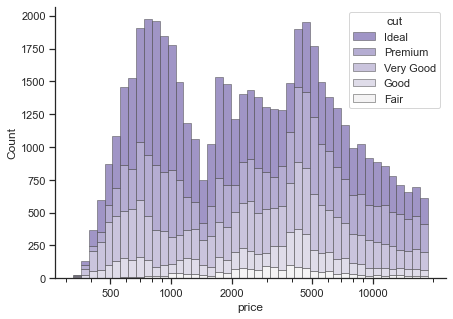

In [27]:
sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

In [28]:
df_exop = sns.load_dataset('planets')
df_exop

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


<AxesSubplot:title={'center':'The heatmap of number of planets according to years and method'}, xlabel='year', ylabel='method'>

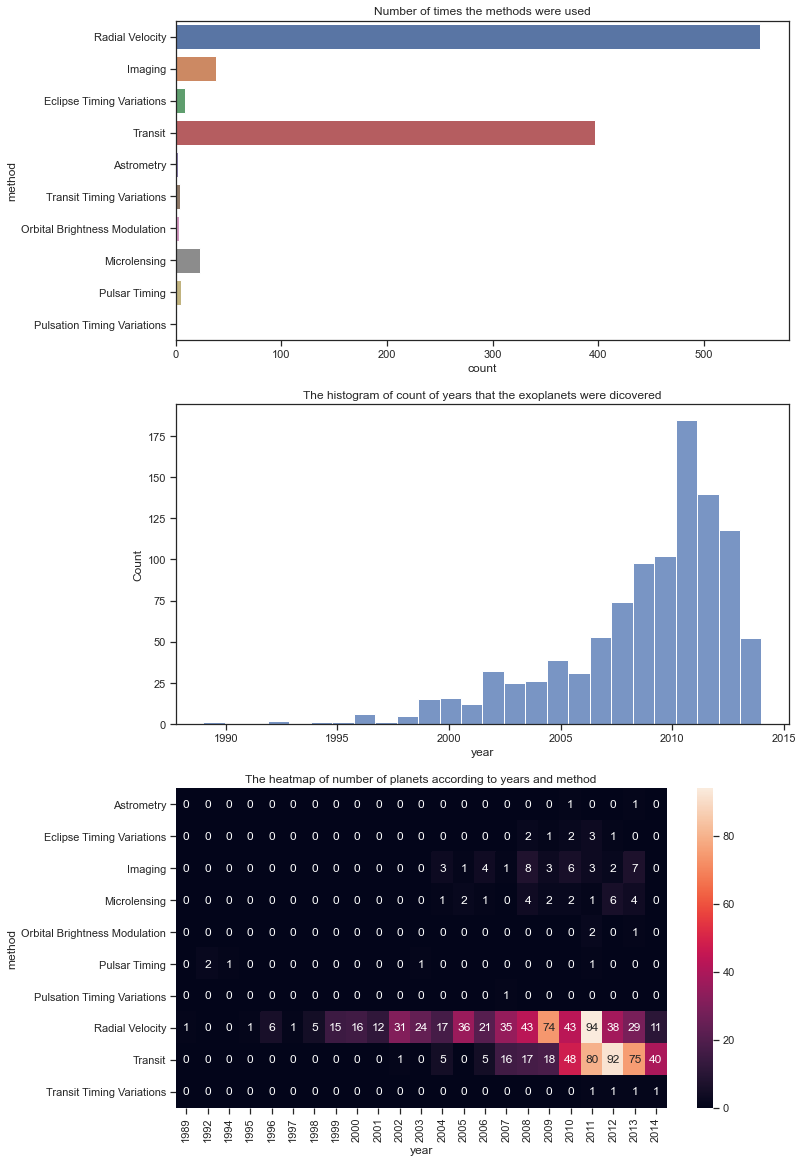

In [29]:
fig, axs = plt.subplots(3, figsize = (11,20))

axs[0].set_title("Number of times the methods were used")
sns.countplot(y = df_exop.method, ax = axs[0])

axs[1].set_title("The histogram of count of years that the exoplanets were dicovered")
sns.histplot(x = df_exop.year, ax = axs[1])

axs[2].set_title("The heatmap of number of planets according to years and method")
df_part = df_exop.groupby(['method','year'],as_index=False)["number"].count()
df_part = df_part.pivot(index='method', columns='year', values='number').fillna(0)
sns.heatmap(data = df_part,annot=True, ax = axs[2])

### 9. Imagine a circle centered at (0.5, 0.5) with radius 0.4. Show 5000 random points in the rectangle ((0, 1), (0, 1)); each point inside the circle should be colored <span style="color:green">green</span> and marked with ‘x’, while each point outside the circle should be colored <span style="color:red">red</span> and marked with a circle.

In [30]:
# random_pointsX = np.random.rand(5000)
# random_pointsY = np.random.rand(5000)
random_points = np.random.rand(2, 5000)

In [31]:
random_points

array([[0.80462123, 0.67916666, 0.51170635, ..., 0.91575539, 0.65652486,
        0.79590294],
       [0.36807976, 0.39487083, 0.5791318 , ..., 0.7892725 , 0.68139411,
        0.8490571 ]])

In [32]:
random_points[0]

array([0.80462123, 0.67916666, 0.51170635, ..., 0.91575539, 0.65652486,
       0.79590294])

In [33]:
random_points[1]

array([0.36807976, 0.39487083, 0.5791318 , ..., 0.7892725 , 0.68139411,
       0.8490571 ])

In [34]:
random_points.shape

(2, 5000)

In [35]:
distances = np.array(np.sqrt((random_points[0] - 0.5)**2 + (random_points[1] - 0.5)**2))

In [36]:
distances

array([0.3319594 , 0.2077326 , 0.079993  , ..., 0.50648902, 0.23959102,
       0.4576018 ])

In [37]:
distances.shape[0]

5000

100%|██████████| 5000/5000 [00:29<00:00, 169.98it/s]


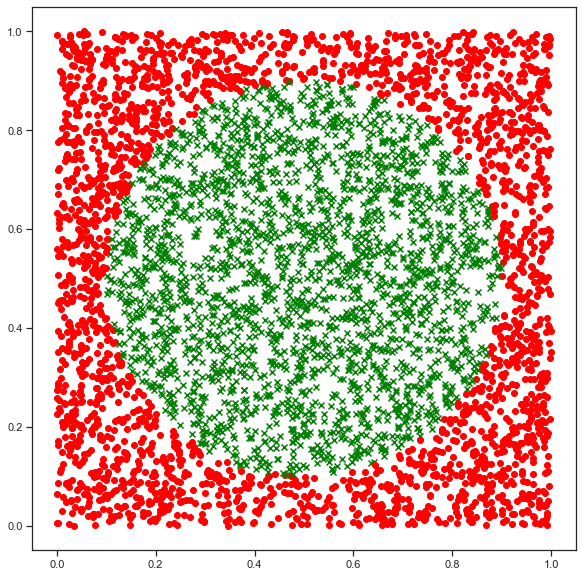

In [38]:
#Not optimal
from tqdm import tqdm #Library for showing the progress of the loops

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()

for i in tqdm(range(distances.shape[0])):
    if distances[i] < 0.4:
        plt.scatter(random_points[0, i], random_points[1, i], marker="x", color="green")
    else:
        plt.scatter(random_points[0, i], random_points[1, i], marker="o", color="red")
ax.set_aspect('equal', adjustable='box')

In [39]:
x = distances < 0.4

In [40]:
x.shape

(5000,)

In [41]:
x

array([ True,  True,  True, ..., False,  True, False])

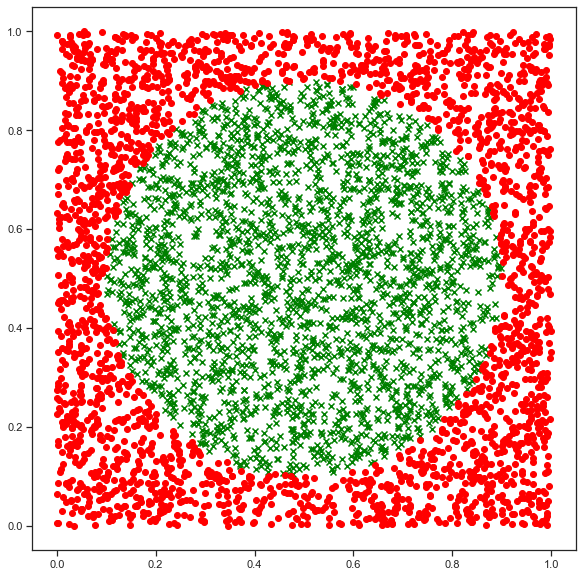

In [42]:
#More optimal :)

'''Broadcasts 0.5, the centre of the circle, into an array of the shape of distances
then creates an array of Booleans
'''
inside_circle = distances < 0.4

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

#Returns an array of indices of points, where the Boolean is True/False. 
#The same as to do it with for loop and iterating through 5000 indices, but faster
indices_green = np.where(inside_circle == True)
indices_red = np.where(inside_circle == False)

plt.scatter(random_points[0, indices_green], random_points[1, indices_green], marker="x", color="green")
plt.scatter(random_points[0, indices_red], random_points[1, indices_red], marker="o", color="red")

ax.set_aspect('equal', adjustable='box')

### 10. Show 5000 random points in the same rectangle, colored by their distance from the point(0.7, 0.3). Note that here the distance (and therefore the color) is <span> <i> continuous <i> </span>.

In [43]:
distances_task_10 = np.array(np.sqrt((random_points[0] - 0.7)**2 + (random_points[1] - 0.3)**2))

In [44]:
distances_task_10

array([0.12482169, 0.09713137, 0.33670322, ..., 0.53473168, 0.38386398,
       0.55736978])

(0.0, 1.0)

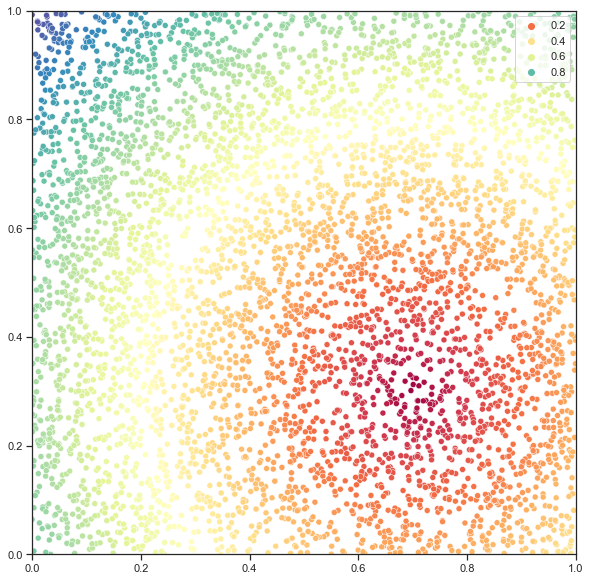

In [45]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot()

cmap = sns.color_palette("Spectral", as_cmap = True)
sns.scatterplot(x = random_points[0], y = random_points[1], hue = distances_task_10, palette = cmap)
# sns.color_palette("Spectral", as_cmap=True)

ax.set_aspect('equal')
plt.legend(loc='upper right')
plt.xlim(0, 1)
plt.ylim(0, 1)